<a href="https://colab.research.google.com/github/rodsei/pattern-recognition/blob/main/Reconhecimento_de_padr%C3%B5es_Semana_2_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Semana 2

Em um jupyter notebook:

1. Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

2. Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

3. Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

4. Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).


### Download da base de dados: Wine Quality

In [1]:
# Bike Sharing
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2020-11-10 03:11:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.1’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.04MB/s    in 0.3s    

2020-11-10 03:11:56 (1.04 MB/s) - ‘Bike-Sharing-Dataset.zip.1’ saved [279992/279992]



In [2]:
!unzip Bike-Sharing-Dataset.zip

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [3]:
import pandas as pd
import numpy as np

full_database = pd.read_csv("day.csv",sep=",")

full_database.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
#X = np.array(full_database.drop(['quality'], axis=1))
#y = np.array(full_database["quality"].values)

X = np.array(full_database.drop(["instant","dteday","cnt"], axis=1))
y = np.array(full_database["cnt"].values)

X.shape, y.shape

((731, 13), (731,))

0


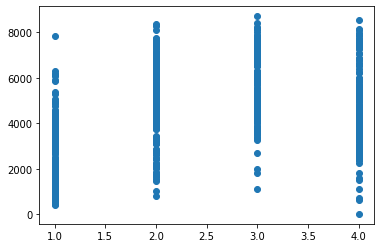

1


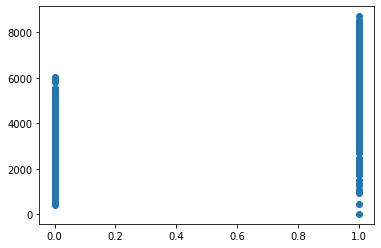

2


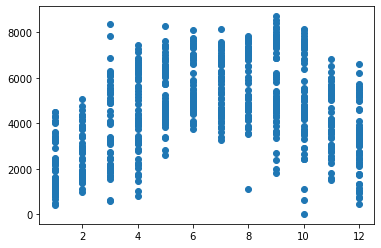

3


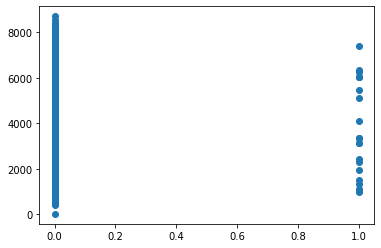

4


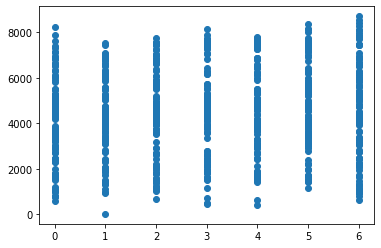

5


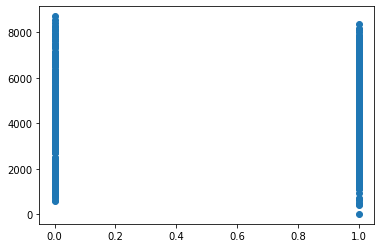

6


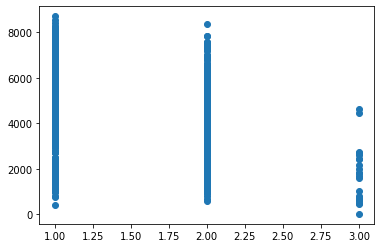

7


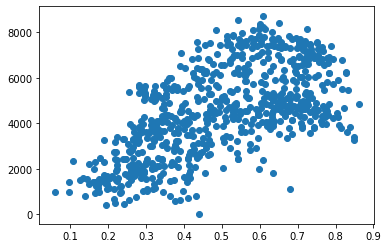

8


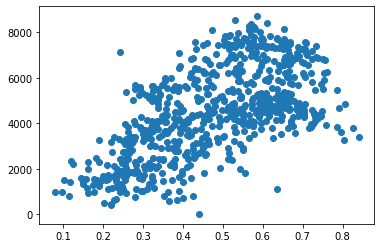

9


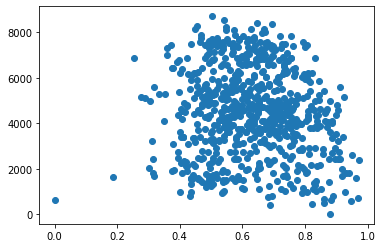

10


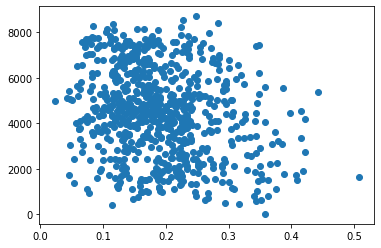

11


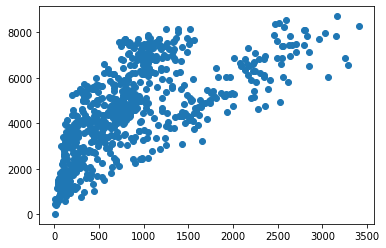

12


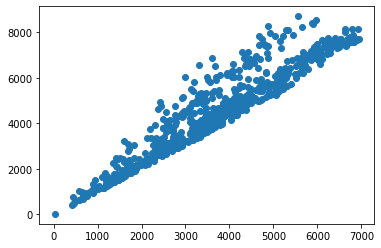

In [5]:
import matplotlib.pylab as plt

for i in range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i], y)
  plt.show()

### Treinando o modelo de Regressão

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print('MSE:', mean_squared_error(y, ypred))
print('Parâmetros \n  Bias;', modelo.intercept_, 
      '\n  Coeficientes:', modelo.coef_)

bias = modelo.intercept_

MSE: 1.2925586811276675e-24
Parâmetros 
  Bias; 9.094947017729282e-13 
  Coeficientes: [-8.59143055e-13 -1.83164595e-12  1.28181320e-13  8.30446072e-13
 -5.59665975e-14  1.55447729e-13  1.09813214e-12 -3.67697870e-13
 -1.39240012e-12 -6.87281381e-14 -9.35868631e-13  1.00000000e+00
  1.00000000e+00]


### Analisando a evolução de treinamento do modelo

#### Definindo uma classe de regressão detalhada

In [75]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear_detalhado():
  def __init__(self, runs):
    self.w = np.zeros((14,1))
    # Historico de evolução do W ao longo dos treinamentos
    self.wh = []
    self.runs = runs
  
  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1)) # shape com a qtd de amostras
    X_b = np.concatenate((bias,X),axis=1)
    return X_b
  
  def predict(self, X):
    X_b = self.addBias(X)
    y = X_b.dot(self.w) # self.w[1]*X[1] + self.w[0]*X[0]
    return y
  
  def fit(self, X, y):
    X_b = self.addBias(X)
    for _ in range(self.runs):
      ypred = self.predict(X)
      erro = ypred - y.reshape(-1,1)
      ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
      self.w = self.w - 0.1*ajuste
      # Recalcula o ypred para salvar no histórico de treinamento
      ypred = self.predict(X)
      mse = mean_squared_error(y,ypred)
      self.wh.append([self.w[0,0], self.w[1,0], mse])

      #print(mean_squared_error(y, ypred))

In [135]:
#Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre 
#intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com 
#concavidade para cima. Não plote um gráfico 3D com visão de cima.

bias = modelo.intercept_
delta = 15000

w0 = np.linspace(bias-delta, bias+delta, 20)
w1 = modelo.coef_

def z_function(w0, w1):
  modelo = regressao_linear_detalhado(20)
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.w[0] = W0[j][k]
      modelo.w[1] = W1[j][k]
      ypred = modelo.predict(X)
      mse = mean_squared_error(y, ypred)
      Erro[j][k] = mse
  return Erro

W0, W1 = np.meshgrid(w0,w1)
Erro = z_function(W0, W1)

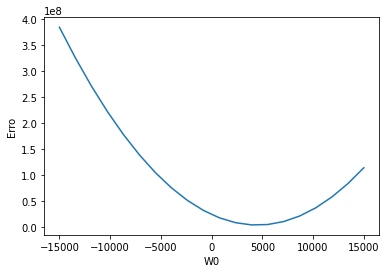

In [151]:
plt.ylabel("Erro")
plt.xlabel("W0")
i=2
plt.plot(W0[i,:],Erro[i,:])
plt.show()